<a href="https://colab.research.google.com/github/k4404c/MAT-422/blob/main/HW4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **4.2 Spectral Graph Bipartitioning**
* Graph partition aims to find out a partition such that the cut (the total
number of edges between two disjoint sets of nodes) is minimized
* For a
weighted graph $G = (V, E)$ , given a bipartition of $V$ into disjoint $V_1$ and $V_2$ $(V1 ∪V2 = V )$, the cut between them can be defined as:
cut($V_1,V_2$) = $∑_{
i∈V_1, j∈V_2}
M_{i j}$.
 * The definition of cut is easily extended to k vertex subsets
* The classical graph bipartitioning problem is to find nearly equally-sized vertex subset $V_i$, $V_2$ of $V$ such that cut($V^∗_1 ,V^∗_2$ ) = min$_{V_1,V_2}$ cut ($V_1,V_2$).
 * or this
purpose, let us define the partition vector $p$ that captures this division.\
$p_i = +1, i ∈ V_1$\
$p_i = -1, i ∈ V_2$
* Given the Laplacian matrix $L$ of $G$ and a partition vector $p$,
the Rayleigh Quotient
$\frac{p^T Lp}
{p^T p} = \frac{1}
{n} · 4cut(V_1,V_2)$.

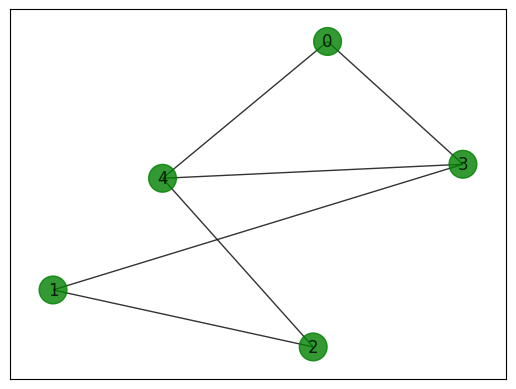

[-1.+0.j  1.+0.j -1.+0.j -1.+0.j  1.+0.j]


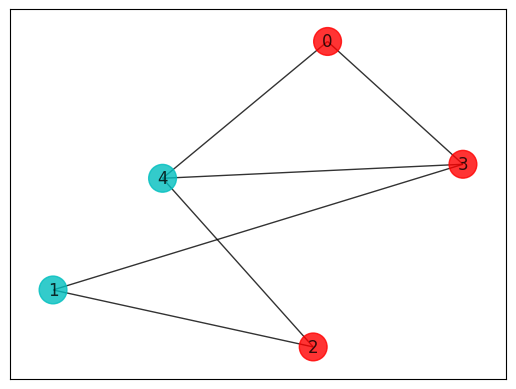


Maxcut approximated solution = [0, 1, 0, 0, 1]


<ipython-input-15-c622c35b32b8>:95: DeprecationWarning: new_param is deprecated: Use picos.Constant instead.
  cc=pc.new_param('c',c)


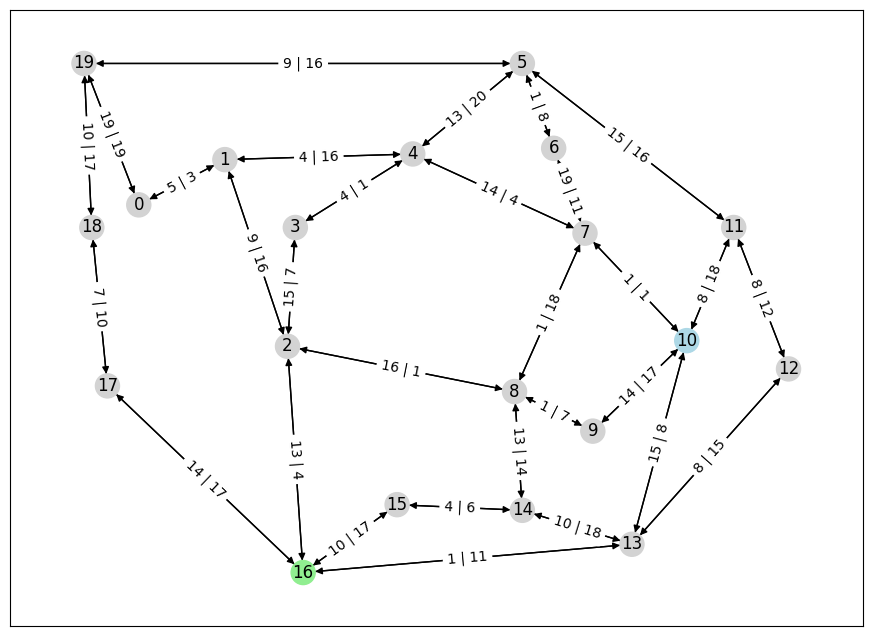

<ipython-input-15-c622c35b32b8>:140: DeprecationWarning: Problem.add_variable is deprecated: Variables can now be created independent of problems, and do not need to be added to any problem explicitly.
  d[e]=mincut.add_variable('d[{0}]'.format(e))
<ipython-input-15-c622c35b32b8>:143: DeprecationWarning: Problem.add_variable is deprecated: Variables can now be created independent of problems, and do not need to be added to any problem explicitly.
  p=mincut.add_variable('p', N)
<ipython-input-15-c622c35b32b8>:198: DeprecationWarning: Problem.obj_value is deprecated: Use value instead.
  mincut.obj_value(), S, T), fontsize=16, y=0.97)


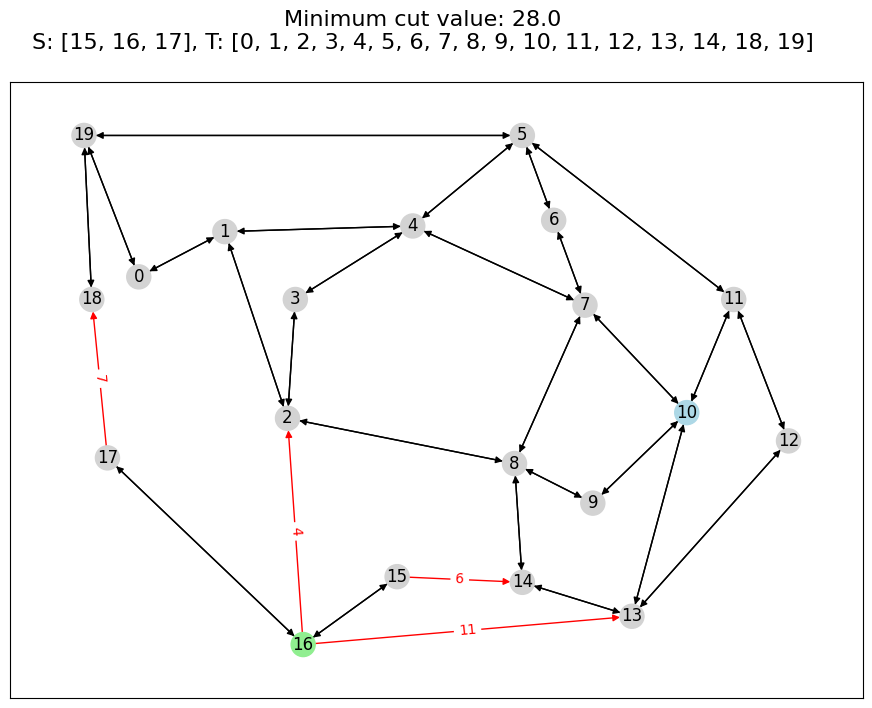

In [15]:
import cvxpy as cp
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg


def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=400, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
    plt.show()

#CLASSICAL
n = 5
G = nx.Graph()
G.add_nodes_from(np.arange(0,4,1))


edges = [(1,2),(1,3),(2,4),(3,4),(3,0),(4,0)]
#edges = [(0,1),(1,2),(2,3),(3,4)]#[(1,2),(2,3),(3,4),(4,5)]
G.add_edges_from(edges)

colors = ["g" for node in G.nodes()]
pos = nx.spring_layout(G)
draw_graph(G, colors, pos)
w = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i, j, default=0)
        if temp != 0:
            w[i, j] = 1


#Goemans-Williamson 0.87
X = cp.Variable((n,n), symmetric = True) #construct nxn matrix
constraints = [X >> 0] + [ X[i,i] == 1 for i in range(n) ]
# diagonals must be 1 (unit) and eigenvalues must be postivie
#semidefinite


objective = sum( (0.5)* (1 - X[i,j]) for (i,j) in edges)
#this is function defing the cost of the cut. You want to maximize this function
#to get heaviest cut

prob = cp.Problem(cp.Maximize(objective), constraints)
prob.solve()
#solves semidefinite program, optimizes linear cost function

sqrtProb = scipy.linalg.sqrtm(X.value)
#normalizes matrix, makes it applicable in unit sphere

hyperplane = np.random.randn(n)
#generates random hyperplane used to split set of points into two disjoint sets of nodes

sqrtProb = np.sign( sqrtProb @ hyperplane)
#gives value -1 if on one side of plane and 1 if on other
#returned as a array

print(sqrtProb)


colors = ["r" if sqrtProb[i] == -1 else "c" for i in range(n)]
sets = [0 if sqrtProb[i] == -1 else 1 for i in range(n)]

draw_graph(G, colors, pos)
print("\nMaxcut approximated solution = " + str(sets))

#!pip install picos
!pip install swiglpk

import picos as pc
import pylab
import random


random.seed(1)

#CODE BELOW SOURCED FROM: https://picos-api.gitlab.io/picos/graphs.html

# Number of nodes.
N=20

# Generate a graph using LCF notation.
G=nx.LCF_graph(N,[1,3,14],5)
G=nx.DiGraph(G) #edges are bidirected

# Generate edge capacities.
c={}
for e in sorted(G.edges(data=True)):
  capacity = random.randint(1, 20)
  e[2]['capacity'] = capacity
  c[(e[0], e[1])]  = capacity

# Convert the capacities to a PICOS expression.
cc=pc.new_param('c',c)

# Manually set a layout for which the graph is planar.
pos={
  0:  (0.07, 0.70), 1:  (0.18, 0.78), 2:  (0.26, 0.45), 3:  (0.27, 0.66),
  4:  (0.42, 0.79), 5:  (0.56, 0.95), 6:  (0.60, 0.80), 7:  (0.64, 0.65),
  8:  (0.55, 0.37), 9:  (0.65, 0.30), 10: (0.77, 0.46), 11: (0.83, 0.66),
  12: (0.90, 0.41), 13: (0.70, 0.10), 14: (0.56, 0.16), 15: (0.40, 0.17),
  16: (0.28, 0.05), 17: (0.03, 0.38), 18: (0.01, 0.66), 19: (0.00, 0.95)
}

# Set source and sink nodes for flow computation.
s=16
t=10

# Set node colors.
node_colors=['lightgrey']*N
node_colors[s]='lightgreen' # Source is green.
node_colors[t]='lightblue'  # Sink is blue.

# Define a plotting helper that closes the old and opens a new figure.
def new_figure():
  try:
    global fig
    pylab.close(fig)
  except NameError:
    pass
  fig=pylab.figure(figsize=(11,8))
  fig.gca().axes.get_xaxis().set_ticks([])
  fig.gca().axes.get_yaxis().set_ticks([])

# Plot the graph with the edge capacities.
new_figure()
nx.draw_networkx(G, pos, node_color=node_colors)
labels={
  e: '{} | {}'.format(c[(e[0], e[1])], c[(e[1], e[0])])
  for e in G.edges if e[0] < e[1]}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
pylab.show()

mincut=pc.Problem()

# Add cut indicator variables.
d={}
for e in G.edges():
  d[e]=mincut.add_variable('d[{0}]'.format(e))

# Add variables for the potentials.
p=mincut.add_variable('p', N)

# State the potential inequalities.
mincut.add_list_of_constraints([d[i,j] >= p[i]-p[j] for (i,j) in G.edges()])

# Set the source potential to one.
mincut.add_constraint(p[s] == 1)

# Set the sink potential to zero.
mincut.add_constraint(p[t] == 0)

# Enforce nonnegativity.
mincut.add_constraint(p >= 0)
mincut.add_list_of_constraints([d[e] >= 0 for e in G.edges()])

# Set the objective.
mincut.set_objective('min', pc.sum([cc[e]*d[e] for e in G.edges()]))

mincut.solve(solver='glpk')

# Determine the cut edges and node sets.
# Rounding is done because solvers might return near-optimal solutions due to
# numerical precision issues.
cut=[e for e in G.edges() if abs(d[e].value-1) < 1e-6]
S  =[n for n in G.nodes() if abs(p[n].value-1) < 1e-6]
T  =[n for n in G.nodes() if abs(p[n].value  ) < 1e-6]
def new_figure():
  try:
    global fig
    pylab.close(fig)
  except NameError:
    pass
  fig=pylab.figure(figsize=(11,8))
  fig.gca().axes.get_xaxis().set_ticks([])
  fig.gca().axes.get_yaxis().set_ticks([])

node_colors=['lightgrey']*N
node_colors[s]='lightgreen' # Source is green.
node_colors[t]='lightblue'

new_figure()

# Draw the nodes and the edges that are not in the cut.
nx.draw_networkx(G, pos, node_color=node_colors,
  edgelist=[e for e in G.edges() if e not in cut and (e[1], e[0]) not in cut])

# Draw edges that are in the cut.
nx.draw_networkx_edges(G, pos, edgelist=cut, edge_color='r')

# Show capacities for cut edges.
labels={e: '{}'.format(c[e]) for e in cut}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='r')

# Show the minimum cut value and the partition.
fig.suptitle("Minimum cut value: {}\nS: {}, T: {}".format(
  mincut.obj_value(), S, T), fontsize=16, y=0.97)

# Show the figure.
pylab.show()